<a href="https://www.kaggle.com/code/hilalalpak/mobile-games-a-b-testing-hypothesis?scriptVersionId=181333327" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color: #ffffff; border-radius: 0 50px 0 20px; background-color:#800080; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 30px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px;"> A/B Testing § Hypothesis Testing</p> 
</div>

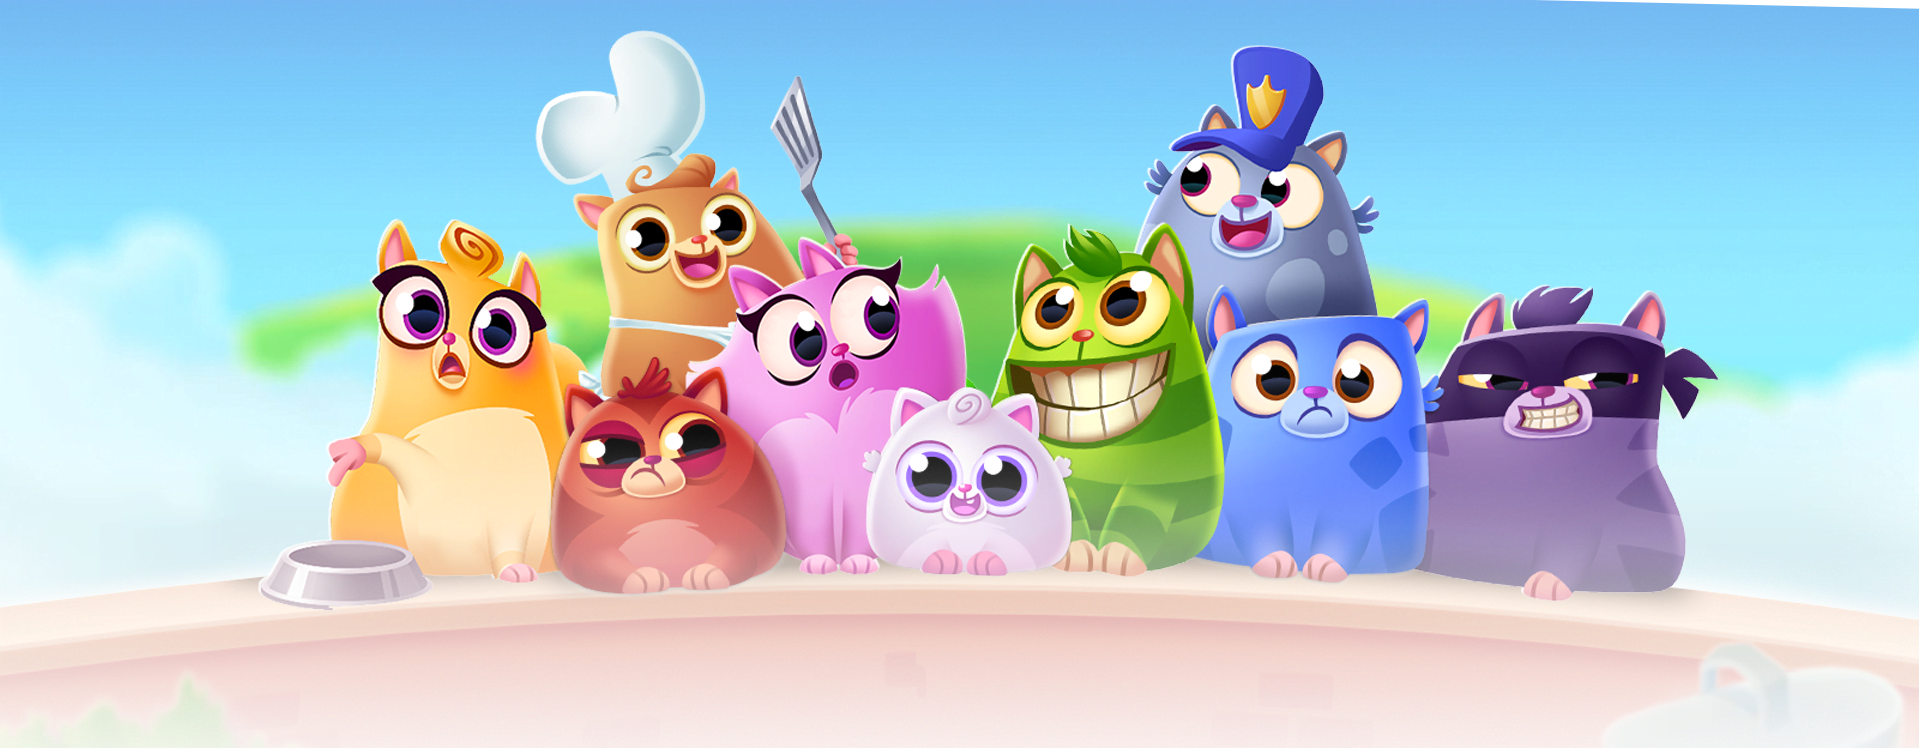

<div style="display:inline-block; text-align:left; margin-bottom:10px;">
    <div style="border: 2px solid #333333; border-radius: 0 50px 0 0; padding: 10px; margin-bottom: 10px; background-color: #D8BFD8;">
        <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;">
            <p style="font-weight:bold; color:#333333; margin:0; font-size: 150%;font-family: Arial, sans-serif">Dataset Definition</p>
        </blockquote>
        <div style="margin-bottom: 10px;">
            <p style="color:#666666; font-size: 110%; font-family: Arial, sans-serif; margin-top:5px;">
                Cookie Cats is a mobile puzzle game developed by Tactile Entertainment. It's a "connect three" style puzzle game where players need to connect tiles of the same color to clear the board and win the level.
            </p>
            <span style="font-weight:bold; color:#666666;">Business Problem: </span>
            <span style="color:#666666;">As players progress in the game, they will encounter gates that force them to wait for a while to progress. In this project, we will analyze the results of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. Specifically, we will analyze the impact on player retention and game rounds.</span>
            <div style="border: 2px solid #333333; border-radius: 0 50px 0 0; padding: 10px; margin-bottom: 10px; background-color: #D8BFD8 ;">
                <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
                    <p style="font-weight:bold; color:#333333; margin:0; font-size: 150%;font-family: Arial, sans-serif"> Dataset Contents </p>
                </blockquote>
                <div style="margin-bottom: 10px;">
                    <p style="color:#666666; font-size: 110%; font-family: Arial, sans-serif; margin-top:5px;">The dataset includes data for 90,189 players.</p>
                    <div style="margin-bottom: 10px;">
                        <span style="font-weight:bold; color:#666666;">- User ID:</span>
                        <span style="color:#666666;">A unique number used to identify each player.</span>
                    </div>
                    <div style="margin-bottom: 10px;">
                        <span style="font-weight:bold; color:#666666;">- Version:</span>
                        <span style="color:#666666;">Whether the player is assigned to the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).</span>
                    </div>
                    <div style="margin-bottom: 10px;">
                        <span style="font-weight:bold; color:#666666;">- Sum_gamerounds:</span>
                        <span style="color:#666666;">The number of game rounds played by the player during the first week after installation.</span>
                    </div>
                    <div style="margin-bottom: 10px;">
                        <span style="font-weight:bold; color:#666666;">- Retention_1:</span>
                        <span style="color:#666666;">Whether the player returned to play the game 1 day after installation.</span>
                    </div>
                    <div style="margin-bottom: 10px;">
                        <span style="font-weight:bold; color:#666666;">- Retention_7:</span>
                        <span style="color:#666666;">Whether the player returned to play the game 7 days after installation.</span>
                    </div>
                    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;">
                        <p style="font-weight:bold; color:#333333; margin:0; font-size: 90%;font-family: Arial, sans-serif">When players install the game, they are randomly assigned to gate_30 or gate_40.</p>
                    </blockquote>
                </div>
            </div>
        </div>
    </div>
</div>



In [1]:
import sys
import subprocess

def install_package(package):
    process = subprocess.Popen([sys.executable, '-m', 'pip', 'install', package],
                               stdout=subprocess.PIPE,
                               stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()

install_package('statsmodels')

In [2]:
# import Required Libraries

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal, normaltest
from statsmodels.stats.proportion import proportions_ztest

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
df = pd.read_csv("/kaggle/input/mobile-games-ab-testing/cookie_cats.csv")

<div style="color: #ffffff; border-radius: 0 50px 0 20px; background-color:#D8BFD8; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 20px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px; color: black; "> Overview & Preprocessing</p> 
</div>

In [4]:
def check_df(dataframe, head=5):
    print("SHAPE".center(70,"-"))
    print(df.shape)
    print("INFO".center(70,"-"))
    print(df.info())
    print("NUNIQUE".center(70,"-"))
    print(df.nunique())
    print("MISSING VALUES".center(70,"-"))
    print(df.isnull().sum())
    print("DUPLICATED VALUES".center(70,"-"))
    print(df.duplicated().sum())
    
    
check_df(df)    

--------------------------------SHAPE---------------------------------
(90189, 5)
---------------------------------INFO---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB
None
-------------------------------NUNIQUE--------------------------------
userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64
----------------------------MISSING VALUES----------------------------
userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,90189.00000,4998412.23450,2883285.60770,116.00000,2512230.00000,4995815.00000,7496452.00000,9999861.00000
sum_gamerounds,90189.00000,51.87246,195.05086,0.00000,5.00000,16.00000,51.00000,49854.00000


In [6]:
df.sort_values(by="sum_gamerounds", ascending=False).tail()
df.sort_values(by="sum_gamerounds", ascending=False).head()

,userid,version,sum_gamerounds,retention_1,retention_7
59687,6610805,gate_30,0,False,False
23707,2639282,gate_40,0,False,False
59670,6608718,gate_30,0,False,False
59645,6604544,gate_30,0,False,False
45094,4995815,gate_40,0,False,False


,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
43671,4832608,gate_30,2438,True,True
48188,5346171,gate_40,2294,True,True


<div style="background-color: #9370DB; border-radius: 10px; padding: 3px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">Convert the data type of the retention variables to integer from bool to make them processable.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">Catch the outliers, and if find it reasonable, remove them from the dataset.</p>
    </blockquote>
</div>

In [7]:
df["retention_1"] = df["retention_1"].astype(int)
df["retention_7"] = df["retention_7"].astype(int)

In [8]:
df[df["sum_gamerounds"] == 0].shape[0]

3994

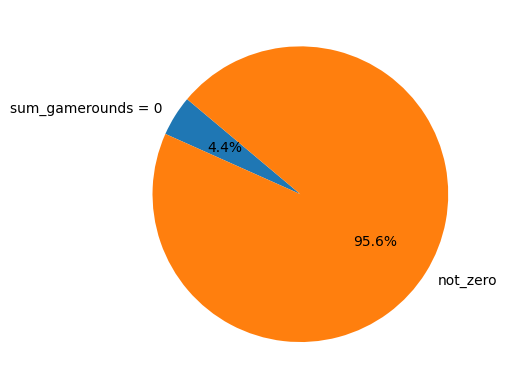

<Figure size 400x400 with 0 Axes>

In [9]:
zero_gamerounds = df[df["sum_gamerounds"] == 0]
zero_count = len(zero_gamerounds)

users = len(df)

percentage = (zero_count / users) * 100

sizes = [percentage, 100 - percentage]
labels = ["sum_gamerounds = 0", "not_zero"]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.figure(figsize=(4, 4))

plt.show();

<div style="background-color: #9370DB; border-radius: 10px; padding: 3px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">3994 players (%4.4) have installed the game but have never played.</p>
          <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">
         There could be many factors contributing to this: </p>
    <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">
-  They became interested in other games.
-  They opened the app but closed it without playing because they didn't like the design or interface.
-  They downloaded the game but haven't started playing yet.</p>
</div>

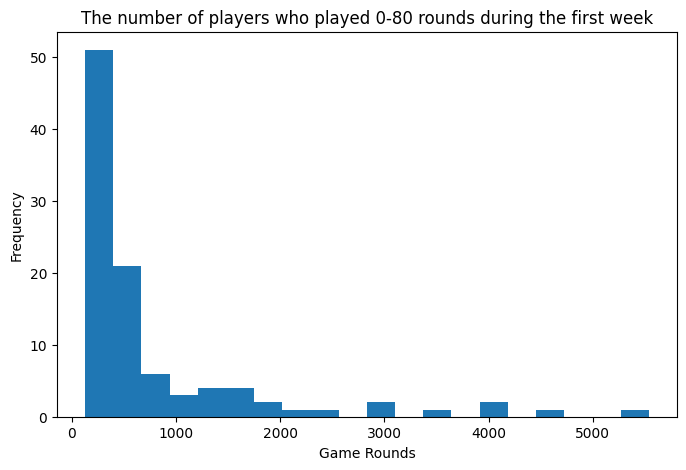

In [10]:
players = df.groupby("sum_gamerounds")['userid'].count()

players[:100].plot(kind='hist', bins=20, figsize=(8,5))
plt.title("The number of players who played 0-80 rounds during the first week")
plt.ylabel("Frequency")
plt.xlabel('Game Rounds')
plt.show();

In [11]:
df.describe([0.10, 0.25, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,10%,25%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.00000,51.87246,195.05086,0.00000,1.00000,5.00000,16.00000,67.00000,134.00000,221.00000,493.00000,49854.00000


<div style="background-color: #FFFFCC; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: black;">The average number of game rounds played by players is approximately 52, but the standard deviation is quite high at 195. This indicates that the distribution is wide, and some players have played many more rounds.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;">
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: black;">The minimum number of game rounds played is 0, meaning some players have not played the game at all.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color:black;">In the 10th percentile, players have played at most 1 round, while in the 99th percentile, players have played around 49,854 rounds. This suggests the presence of outliers in the dataset.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color:black;">The maximum number of rounds played is 49,854. This again indicates the presence of outliers, which should be considered in the analysis.</p>
    </blockquote>
</div>

<Figure size 800x600 with 0 Axes>

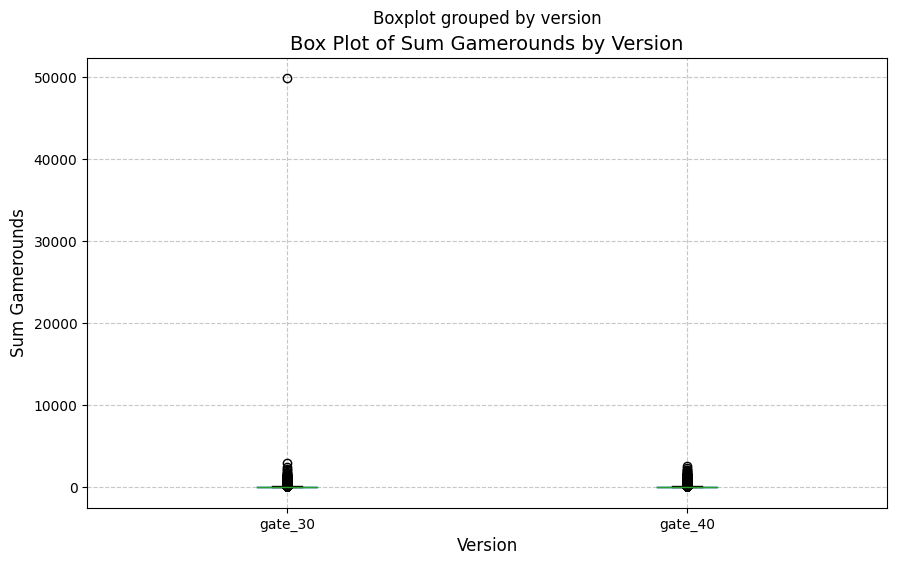

In [12]:
plt.figure(figsize=(8, 6))
df.boxplot(column='sum_gamerounds', by='version', figsize=(10, 6))

plt.title('Box Plot of Sum Gamerounds by Version', fontsize=14)  
plt.xlabel('Version', fontsize=12) 
plt.ylabel('Sum Gamerounds', fontsize=12) 

plt.grid(True, linestyle='--', alpha=0.7)

plt.show();


In [13]:
# Remove the outliers associated with the `gate_30` variable as these may lead to misleading results in the inter-group comparison.

df = df[df["sum_gamerounds"] < df["sum_gamerounds"].max()]

<Figure size 800x600 with 0 Axes>

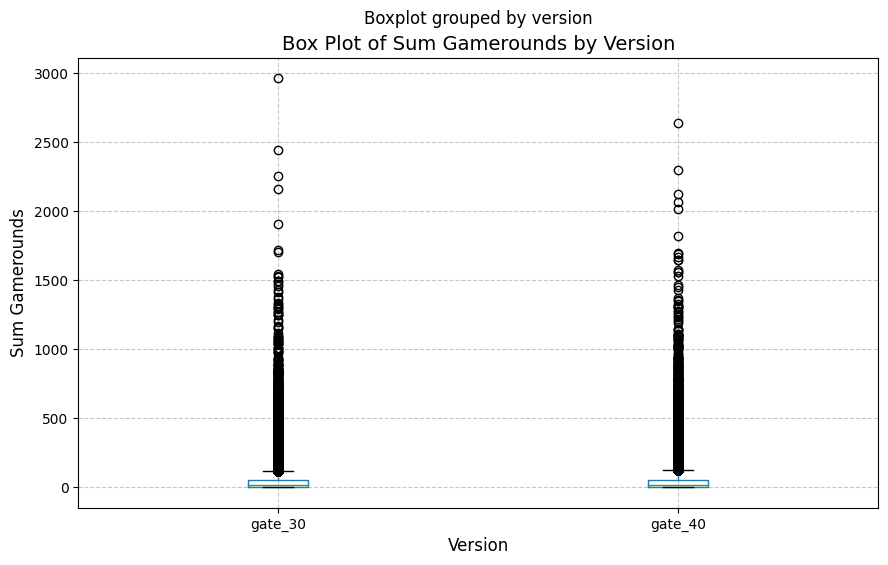

In [14]:
plt.figure(figsize=(8, 6))
df.boxplot(column='sum_gamerounds', by='version', figsize=(10, 6))

plt.title('Box Plot of Sum Gamerounds by Version', fontsize=14)  
plt.xlabel('Version', fontsize=12) 
plt.ylabel('Sum Gamerounds', fontsize=12) 

plt.grid(True, linestyle='--', alpha=0.7)

plt.show();

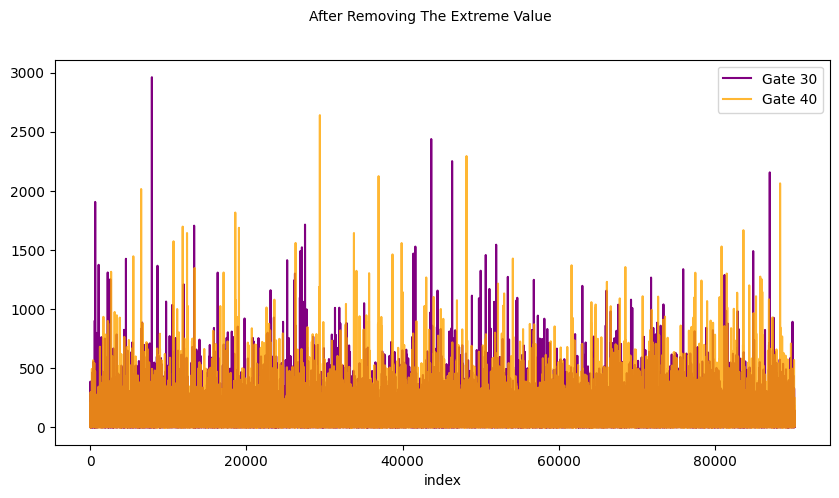

In [15]:
df[df["version"] == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", color = "Purple", figsize = (10,5))
df[df["version"] == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40", color = "Orange", alpha = 0.8)
plt.suptitle("After Removing The Extreme Value", fontsize = 10); 

In [16]:
df.groupby("version").agg({"retention_1": "sum", "retention_7": "sum", "sum_gamerounds": ("sum", "mean")})

# There doesn't seem to be a significant difference in the total retention values between the control group and the test group. 
# However, this could have occurred by chance. We need to evaluate it statistically.

retention_1 retention_7 sum_gamerounds         
                sum         sum            sum     mean
version                                                
gate_30       20034        8501        2294941 51.34211
gate_40       20119        8279        2333530 51.29878

In [17]:
df.groupby("sum_gamerounds")["userid"].count().loc[[30, 40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

<div style="color: #ffffff; border-radius: 0 50px 0 20px; background-color:#D8BFD8; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 20px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px; color: black; "> A/B TESTING § HYPOTHESIS TESTING </p> 
</div>

<div style="background-color: #808080; border-radius: 10px; padding: 3px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">
A/B testing is an experimental design that compares a group with a change against a control group to evaluate the effect of a change.</p>
<p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">Hypothesis testing is a statistical method where a null hypothesis and an alternative hypothesis are defined; by examining the data, it is determined whether the null hypothesis should be rejected or not.</p>
    </blockquote>
</div>

In [18]:
df.groupby("version").agg({"sum_gamerounds": ["count", "median", "mean", "std", "min", "max"]})

sum_gamerounds                                      
                 count   median     mean       std min   max
version                                                     
gate_30          44699 17.00000 51.34211 102.05760   0  2961
gate_40          45489 16.00000 51.29878 103.29442   0  2640

In [19]:
# Average of players returning to the game on the first day by version.

df.groupby(["version","retention_1"]).agg({ "sum_gamerounds" : "mean"})

sum_gamerounds
version retention_1                
gate_30 0                  16.35909
        1                  94.41170
gate_40 0                  16.34040
        1                  95.38118

<div style="background-color: #808080; border-radius: 10px; padding: 3px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">In the video game industry, a common way to assess how fun and engaging a game is, is through 1-day retention: the percentage of players who return to play the game within one day after installing it.</p>
<p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;"> The higher the 1-day retention, the easier it is to maintain player engagement and build a large player base.</p>
    </blockquote>
</div>


In [20]:
# Average of players returning to the game in the first week by version.

df.groupby(["version","retention_7"]).agg({ "sum_gamerounds" : "mean"})

sum_gamerounds
version retention_7                
gate_30 0                  25.79651
        1                 160.11752
gate_40 0                  25.85636
        1                 165.64984

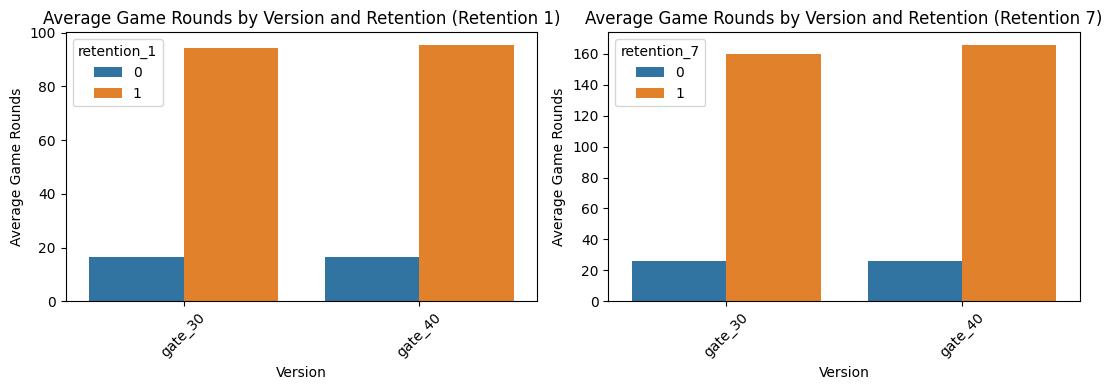

In [21]:
mean_1 = df.groupby(["version", "retention_1"])["sum_gamerounds"].mean().reset_index()
mean_2 = df.groupby(["version", "retention_7"])["sum_gamerounds"].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Ret1
sns.barplot(data=mean_1, x="version", y="sum_gamerounds", hue="retention_1", ax=axes[0])
axes[0].set_title("Average Game Rounds by Version and Retention (Retention 1)")
axes[0].set_xlabel("Version")
axes[0].set_ylabel("Average Game Rounds")
axes[0].tick_params(axis='x', rotation=45)

# Ret7
sns.barplot(data=mean_2, x="version", y="sum_gamerounds", hue="retention_7", ax=axes[1])
axes[1].set_title("Average Game Rounds by Version and Retention (Retention 7)")
axes[1].set_xlabel("Version")
axes[1].set_ylabel("Average Game Rounds")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show();

In [22]:
df['version'] = df['version'].replace({'gate_30': 'C', 'gate_40': 'T'})

In [23]:
# H0 = There is no difference between the two groups. (rejected if p-value < 0.05 so it means False)
# H1 = There is a difference between the two groups.

def AB_Testing(dataframe, control, test):
    
    groupC = dataframe[dataframe[control] == "C"][test]
    groupT = dataframe[dataframe[control] == "T"][test]
    
    ntC = shapiro(groupC)[1] < 0.05
    ntT = shapiro(groupT)[1] < 0.05

    if (ntC == False) & (ntT == False):
        leveneTest = stats.levene(groupC, groupT)[1] < 0.05
        
        if leveneTest == False:
            ttest = stats.ttest_ind(groupC, groupT, equal_var=True)[1]
        else:
            ttest = stats.ttest_ind(groupC, groupT, equal_var=False)[1]
    else:
        ttest = mannwhitneyu(groupC, groupT)[1] 
        
    ab_hypothesis = ttest < 0.05
    test_type = "Parametric" if (ntC == False) & (ntT == False) else "Non-Parametric"
    homogeneity = "Yes" if (ntC == False) & (ntT == False) and leveneTest == False else "No"
    comment = "A/B groups are similar!" if ab_hypothesis == False else "A/B groups are not similar!"

    result = {
        "Test Type": [test_type],
        "Homogeneity": [homogeneity],
        "AB Hypothesis": ["Fail to Reject H0" if ab_hypothesis == False else "Reject H0"],
        "p-value": [ttest],
        "Comment": [comment]
    }
    
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    return pd.DataFrame(result)

AB_Testing(df, "version", "sum_gamerounds") 

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,Homogeneity,AB Hypothesis,p-value,Comment
0,Non-Parametric,No,Fail to Reject H0,0.05089,A/B groups are similar!


<div style="background-color: #FFFFCC; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: black;">The higher user activity in Gate 30 compared to Gate 40 suggests that the level change could increase customer churn. In addition to other metrics such as in-game spending, retention is crucial because retaining players is a significant part of revenue. </p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;">
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: black;">The likelihood of high activity may be associated with different difficulty levels or rewards offered. Therefore, the differences between gate levels need to be carefully examined.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color:black;">Improving the user experience is important for increasing player engagement. Optimizing factors such as user interface, game mechanics, and graphics can make the game more appealing to players, thereby leading to longer participation periods.</p>
    </blockquote>
</div>